# Import modules

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
random_state=59

In [62]:
df=pd.read_pickle('data/arbres_grenoble_clean.pkl')

# Data selection

## Removing missing years

In [63]:
#I delete the row where we don't a year for the planting
df_missing_year=df.dropna(axis=0, subset=['annee_de_plantation'])
df.dropna(axis=0, subset=['annee_de_plantation'], inplace=True)
df['annee_de_plantation'].astype(int)


elem_point_id
34835    2015
34836    2015
34837    2015
34838    2015
34839    2015
         ... 
44732    2018
44733    2018
44734    2018
44741    2018
44742    2018
Name: annee_de_plantation, Length: 29526, dtype: int64

# Removing sector more than 6 

In [64]:
df=df[df['adr_secteur']<7]

# Map

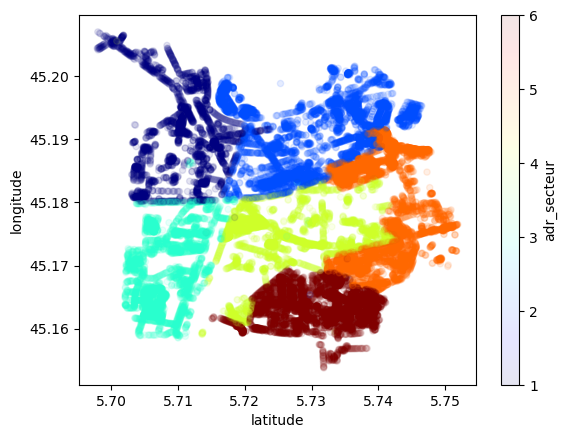

In [65]:
df.plot(
    kind='scatter',
    x='latitude',
    y='longitude',
    alpha=0.1,
    c='adr_secteur',
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.show()


# Train-test split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=df.drop("annee_de_plantation", axis=1)
y=df["annee_de_plantation"]


X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=random_state)

In [68]:
X_train.columns

Index(['sous_categorie', 'code_parent', 'adr_secteur', 'genre_bota', 'espece',
       'stade_de_developpement', 'collectivite', 'structure', 'geo_point_2d',
       'longitude', 'latitude'],
      dtype='object')

# Pipeline 1

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin
#Define a class for hyperparameters exploration

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Columns to process
num_cols=['longitude','latitude','adr_secteur']
cat_cols=['sous_categorie','code_parent', 'genre_bota',
    'espece','stade_de_developpement', 'collectivite', 'structure']

## Numeric

Imputer will replace the missing value.
Standardization will be used.

In [70]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Categorial

In [71]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

## Preprocessor
ColumnTransformer will allow us to work on different type of columns separetely be keep them stacked together

In [ ]:
preprocessor_1 = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Modelisation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_1=Pipeline([
    ('preprocessing', preprocessor_1),
    ('classifier', RandomForestRegressor(n_estimators=10,random_state=random_state))
])

# Model 1

## Train and evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model_1.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
# sns.heatmap(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

## Cross validation and tuning

In [77]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy moyenne :", scores.mean())

In [78]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'classifier__n_estimators': [50, 100, 200],
#     'classifier__max_depth': [None, 5, 10]
# }

# grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres :", grid_search.best_params_)



## Save the pipeline and model

In [79]:
# import joblib

# joblib.dump(grid_search.best_estimator_, "best_model.pkl")

## Import the pipeline and model

In [80]:
# model = joblib.load("best_model.pkl")

## Train vs Test

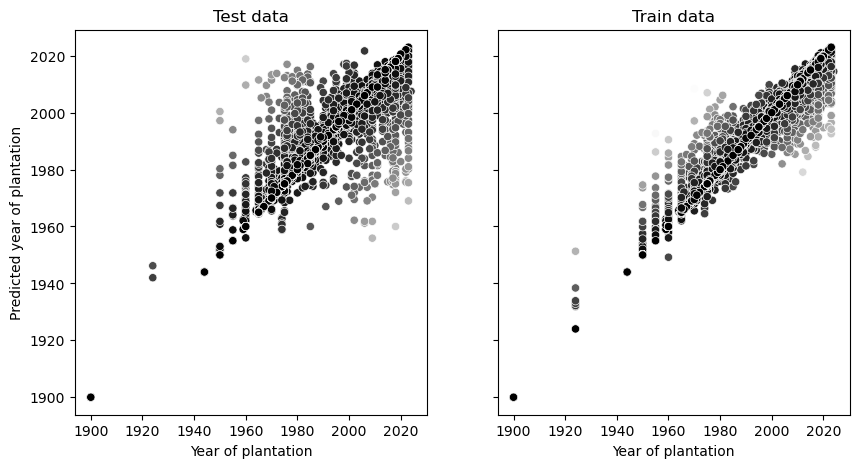

In [ ]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,5), sharey=True)

y_test_pred = model_1.predict(X_test)
error_test=abs(y_test_pred-y_test)

ax=sns.scatterplot(
    x=y_test,
    y=y_test_pred,
    hue=error_test,
    palette='gist_gray',
    ax=ax1
)
ax1.set_xlabel("Year of plantation")
ax1.set_ylabel("Predicted year of plantation")
ax1.get_legend().remove()
ax1.set_title("Test data")

y_train_pred=model_1.predict(X_train)
error_train=abs(y_train_pred-y_train)
ax=sns.scatterplot(
    x=y_train,
    y=y_train_pred,
    hue=error_train,
    palette='gist_gray',
    ax=ax2
)
ax2.set_xlabel("Year of plantation")
ax2.set_ylabel("Predicted year of plantation")
ax2.get_legend().remove()
ax2.set_title("Train data")

plt.show()

In [95]:
from sklearn.metrics import root_mean_squared_error
rmse_test=root_mean_squared_error(y_test, y_test_predic)
rmse_train=root_mean_squared_error(y_train, y_train_pred)
print(f"The RMSE is:")
print(f"Test\t{round(rmse_test,1)} years\nTrain\t{round(rmse_train,1)} years")


The RMSE is:
Test	6.9 years
Train	3.0 years


In [86]:
df.columns

Index(['sous_categorie', 'code_parent', 'adr_secteur', 'genre_bota', 'espece',
       'stade_de_developpement', 'annee_de_plantation', 'collectivite',
       'structure', 'geo_point_2d', 'longitude', 'latitude'],
      dtype='object')